## Differencing algorithm
Technique to detect small signals:
    * take spectrogram - normalise each pixel in  f row by the average of the row
    * find the difference between each pixel t and t+1  ie. d(t,f) = h(t+1,f) - h(t,f)
    * plot histogram - logN vs d(t,f)
    * start with the noise and then add in a signal


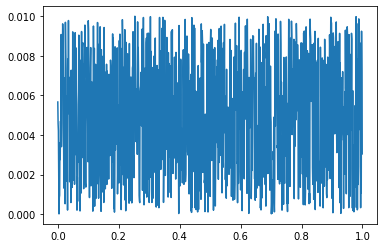

In [314]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

#time series
dt = 1/1000
ts = np.arange(0,1,dt)



#add some random noise
nse1 = 0.01 * np.random.random(size=len(ts))


plt.plot(ts,nse1)
plt.rcParams["figure.figsize"] = (12,7)

Text(0.5, 0, 'Time s')

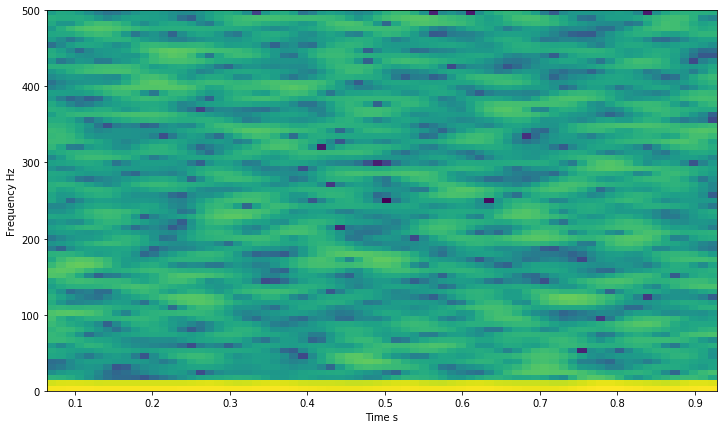

In [315]:
#spectrograph of this noise environment

#To change the number of bins NFFT is adjusted - want near 1:1 time/freq ratio

#Pxx, freqs, bins, im = ax2.specgram(x, NFFT=NFFT, Fs=Fs, noverlap=900)
spectrum, freqs, bins, im = plt.specgram(x=nse1, Fs=1/dt, NFFT = 140)
plt.ylabel("Frequency Hz")
plt.xlabel("Time s")

In [306]:
#Only 6 bins above. Why??


np.shape(spectrum)


(71, 72)

In [307]:
#find average of each row in spectrum

#dimensions
[ydim,xdim] = np.shape(spectrum)

#initialise array
norm_spectrum = np.ones(np.shape(spectrum))

#loop over every row in the array, add the elements in each and divide every element by the average
for row in range(len(spectrum)):
    #sum the rows
    sum_row = np.sum(spectrum[row])
    
    #divide sum by number of elements in row
    ave_row = sum_row/xdim
    
    #divide row by row average to normalise
    norm_row = spectrum[row]/sum_row
    
    norm_spectrum[row,:] = norm_row
#plt.pcolormesh(bins, freqs, 20 * np.log10(norm_spectrum))

np.shape(norm_spectrum)

(71, 72)

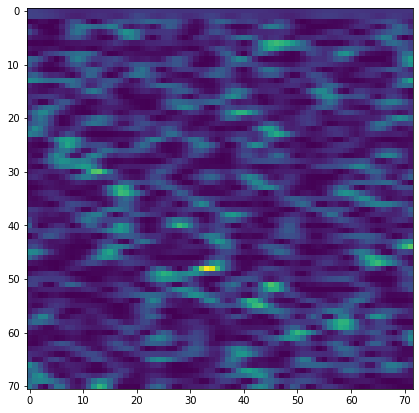

In [313]:
plt.imshow(norm_spectrum)

In [308]:
#array containing the differences between successive columns of spectrogram data in spectrum

#difference array will have one fewer column 

diff_spec = np.ones((ydim, xdim -1))


for i in range(ydim):
    for j in range(xdim-1):
      
        diff_spec[i,j] = norm_spectrum[i,j+1] - norm_spectrum[i,j]
#square differences
diff_spec = np.square(diff_spec)
    

Text(0, 0.5, 'log(N)')

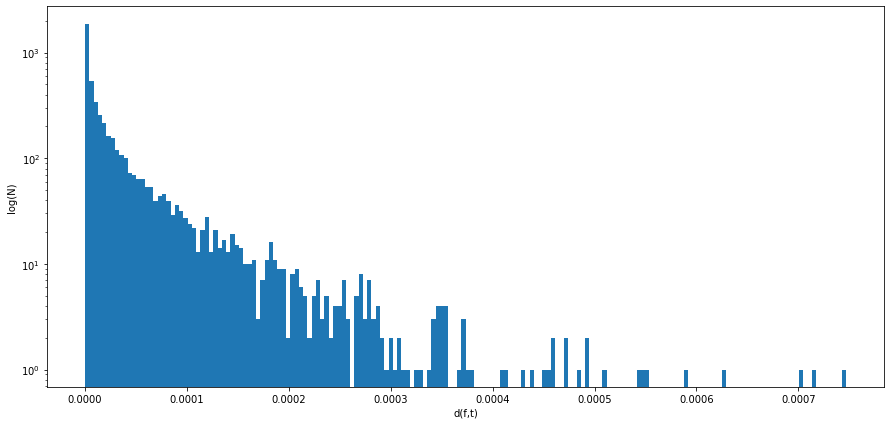

In [309]:
#want to plot all pixels so flatten array to 1D
diff_spec = np.array(diff_spec).flatten()

#Histogram of logN vs diff(f,t) - (N counts)

n, bins, patches = plt.hist(x=diff_spec, bins='auto', log = True)# #color='#0504aa',
                            #alpha=0.7, #rwidth=0.85)
    
plt.xlabel('d(f,t)')
plt.ylabel('log(N)')

